In [1]:
#OPEN FILES AND IMPORT LIBRARIES
import pandas as pd
import re
import matplotlib.pyplot as plt

df0 = pd.read_excel("Data Analyst Report Writer Sample Dataset.xlsx", index_col=0)
#df0 = pd.read_csv("Data Analyst Report Writer Sample Dataset.csv",index_col=0)

In [2]:
#FIRST FIVE LINES
#-----------------
df0.head(5)

,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance
ObjectId,,,,,,,,,,,,,,,,,
5bd23e5214b35001c88804db,computer software technical support,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,0.804382
5aca7f0d0cbf2c0460d62041,equipment servicing,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.841847
5add7a07dccd3b50f3bf5a69,laboratory equipment installation,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.023003
5acbe821c2c2f1713ae19ccf,laboratory maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.128249
5aa76e2653b12204854a64f0,mechanical equipment maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.946662


In [3]:
#SHAPE OF THE DATASET
#---------------------
df0.shape

(231713, 17)

In [4]:
#Check that the data types are correct
'''Agregation vectors should be floats or ints not objects, if object then there may be bad characters'''
df0.dtypes

skill_title                    object
DocumentId                      int64
Type                           object
OriginalTitle                  object
CreationDate           datetime64[ns]
OriginalCompanyName            object
RangeFrom                     float64
RangeTo                       float64
ClusteredTitle                 object
OriginalLocation               object
OriginalSalary                 object
CountryCode                    object
City                           object
SalaryParsed                   object
State                          object
Complexity                    float64
importance                    float64
dtype: object

In [5]:
#Name of columns and index of each column:
''' This function provides a clean output of columns and indexes'''

def col(dfs):
    list_col = list(dfs.columns.values)
    list_number_col = []
    zip_list = []
    for i in range(0, len(list_col)):
        list_number_col.append(i)
    zip_list = list(zip(list_number_col,list_col))
    #[(0, 'event_date'), (1, 'id'), (2, 'dimension_1')]
    for i in zip_list:
        a = i[0]
        b = i[1]
        print(str(a) + "|" +  b)
print(col(df0))

0|skill_title
1|DocumentId
2|Type
3|OriginalTitle
4|CreationDate
5|OriginalCompanyName
6|RangeFrom
7|RangeTo
8|ClusteredTitle
9|OriginalLocation
10|OriginalSalary
11|CountryCode
12|City
13|SalaryParsed
14|State
15|Complexity
16|importance
None


In [59]:
#Check unique values of columns
'''Use this line to have a close look at the data'''
set(list(df0.iloc[:,11]))
#len(sorted(set(list(df0.iloc[:,5])), reverse=True))

#check = sorted(set(list(df0.iloc[:,5])), reverse=True)
#print("Length of list : ",len(check))
#print("TOP 3 VALUES OF LIST : ",(check[0:3]))
#print("BOT 3 VALUES OF LIST : ",(check[-3:]))



{'AU', 'CA', 'GB', 'SA', 'US', nan}

In [9]:
'''Vectors Analysis:
---------------------
- skill_title :            3578 Job Titles   
- DocumentId :             7642 IDS
- Type:                    ['resume', 'job']
- OriginalTitle:            
- CreationDate:
- CreationDate:            5708 dates ['2020-04-05 03:56:11', .... , Timestamp('2005-10-15 00:00:00')]] 
- OriginalCompanyName:     Where the employee comes from
- RangeFrom:               
- RangeTo:

- OriginalSalary:

- OriginalLocation:
- CountryCode:
- City
- State

- SalaryParsed:          ["b'\\x00'", "b'\\x01'"] cannot use
- Complexity:            [nan,1.0,.... 10.0]      Ten grades of complexity
- importance:            [0.804382]



VARIABLES:
---------
Suply: Demand = Resume
       Supply = Job

'''


"Vectors Analysis:\n---------------------\n- skill_title :            3578 Job Titles   \n- DocumentId :             7642 IDS\n- Type:                    ['resume', 'job']\n- OriginalTitle:           5708 dates ['2020-04-05 03:56:11', .... , Timestamp('2005-10-15 00:00:00')]] \n- CreationDate:\n- OriginalCompanyName: \n- RangeFrom:\n- RangeTo:\n\n"

In [159]:
import datetime as dt
#CREATE INDEX FOR YEAR AND MONTH
df0['CreationDate'] = pd.to_datetime(df0['CreationDate'])
df0['year'] = pd.DatetimeIndex(df0['CreationDate']).year
df0['month'] = pd.DatetimeIndex(df0['CreationDate']).month

#CREATE INDEX FOR YEAR 2020
filterDate = [2020]
index_date = df0.year.isin(filterDate)

#CREATE NEW DATASET FOR 2020 ONLY
df1 = df0[index_date]
print("ALL DATES (df0 shape) = ",df0.shape, "\n","2020 ONLY (df1 shape) = ",df1.shape)

ALL DATES (df0 shape) =  (231713, 19) 
 2020 ONLY (df1 shape) =  (112744, 19)


In [160]:
#Prepare Series Supply of Jobs for 2020
#------------------------------------------
regex_supply = "resume"
series_supply = df1.iloc[:,2]
index_supply = series_supply.str.contains(regex_supply)
index_supply

#REMOVE NOT NEEDED DATES
#--------------------------
df1_supply = df1[index_supply]
print("SUPPLY (RESUME) = ",df1_supply.shape)

SUPPLY (RESUME) =  (3981, 19)


In [161]:
#Prepare Series Demand of Jobs for 2020
#------------------------------------------
regex_demand = "job"
series_demand = df1.iloc[:,2]
index_demand = series_demand.str.contains(regex_demand)
index_demand

#REMOVE NOT NEEDED DATES
#--------------------------
df1_demand = df1[index_demand]
print("DEMAND (JOBS) = ",df1_demand.shape)

DEMAND (JOBS) =  (108763, 19)


In [174]:
#JOBS - TEN MOST DEMANDED SKILLS IN 2020
#----------------------------------------
df2_demand = df1_demand.iloc[:,[0,1]]
df2_demand_agg = df2_demand.groupby('skill_title').count()
df2_demand_agg = df2_demand_agg.sort_values(by='DocumentId', ascending=False).apply(lambda x: x.nlargest(10)).reset_index()
df2_demand_agg = df2_demand_agg.rename(columns={'DocumentId':'skill_count'})
df2_demand_agg

,skill_title,skill_count
0,Responsibility,2023
1,Management,2007
2,Clinical Trials,1972
3,Communication Skills,1922
4,Work Collaboratively,1581
5,Research,1430
6,Training,1358
7,Interpersonal,1197
8,Leadership,1115
9,Prioritization,1087


In [175]:
#RESUME - DEMANDED SKILLS NEEDED IN 2020 BY JOB TITLE, SKILL TYPE, LOCATION
#-------------------------------------------------------------------------
df2_demand_multivector = df1_demand.iloc[:,[0,1,8,11,12]]
df2_demand_multivector = df2_demand_multivector.groupby(['ClusteredTitle','skill_title','City','CountryCode']).count()
df2_demand_multivector = df2_demand_multivector.sort_values(by=['DocumentId','ClusteredTitle','City'], ascending=False).reset_index()
df2_demand_multivector = df2_demand_multivector.rename(columns={'DocumentId':'skill_count'})
df2_demand_multivector

,ClusteredTitle,skill_title,City,CountryCode,skill_count
0,regulatory affairs manager,Drug Development,MontrÃ©al,CA,130
1,regulatory affairs manager,English,MontrÃ©al,CA,130
2,regulatory affairs manager,French,MontrÃ©al,CA,130
3,regulatory affairs manager,Teamwork,MontrÃ©al,CA,130
4,regulatory affairs manager,Business Strategy,MontrÃ©al,CA,128
...,...,...,...,...,...
66072,.net developer,software implementation,Toronto,CA,1
66073,.net developer,software planning,Toronto,CA,1
66074,.net developer,software product management,Toronto,CA,1
66075,.net developer,time management,Toronto,CA,1


In [176]:
#SAMPLE AGREGATION WHAT ARE THE 20 MOST DEMANDED JOBS IN THE CITY OF "Toronto"
index_city = df2_demand_multivector.pipe(lambda x: x['City'] == "Toronto")
df2_city = df2_demand_multivector[index_city].iloc[:,[1,2]].groupby('skill_title').count().sort_values(by= 'City', ascending=False).head(5).rename(columns={'City':'skill_count'})
df2_city

,skill_count
skill_title,
Responsibility,65
Management,64
Interpersonal,50
Communication Skills,48
Problem Solving,45


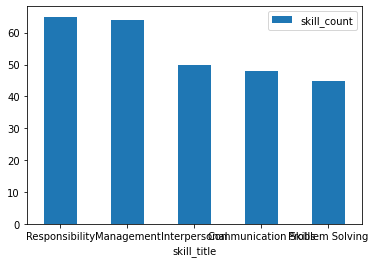

In [177]:
df2_city.plot.bar(rot=0)

In [178]:
#OUTPUT THE INVENTORY OF SKILLS FOR JOBS
(df2_demand_multivector).to_csv('inventory_skills_demand.csv', sep = ',', index=False)

In [179]:
#RESUME - SUPPLIED SKILLS IN 2020 BY JOB TITLE, SKILL TYPE, LOCATION
#-------------------------------------------------------------------------
df2_supply_multivector = df1_supply.iloc[:,[0,1,8,11,12]]
df2_supply_multivector = df2_supply_multivector.groupby(['ClusteredTitle','skill_title','City','CountryCode']).count()
df2_supply_multivector = df2_supply_multivector.sort_values(by=['DocumentId','ClusteredTitle','City'], ascending=False).reset_index()
df2_supply_multivector = df2_supply_multivector.rename(columns={'DocumentId':'skill_count'})
df2_supply_multivector

,ClusteredTitle,skill_title,City,CountryCode,skill_count
0,scientist,Research,Kalamazoo,US,8
1,scientist,Drug Discovery,Kalamazoo,US,7
2,scientist,High Performance Liquid Chromatography,Kalamazoo,US,7
3,researcher,Research,Kalamazoo,US,7
4,researcher,Drug Discovery,Kalamazoo,US,6
...,...,...,...,...,...
3720,Unclustered,Retail Sales,District Heights,US,1
3721,Unclustered,Supervision,District Heights,US,1
3722,Unclustered,financial reporting,District Heights,US,1
3723,Unclustered,internal financial reporting,District Heights,US,1


In [180]:
#OUTPUT THE INVENTORY OF SKILLS FOR JOBS
(df2_supply_multivector).to_csv('inventory_skills_supply.csv', sep = ',', index=False)